# Measuring Cohesiveness of Nationalism Using Doc2Vec 

In [ ]:
import analyze

In [ ]:
data = analyze.prepare_d2v_documents('text_data.csv', 'stopwords-zh.txt')

In [ ]:
data.head()

,title,author,filepath,year,raw_text,normalized_text,tokenized_text,length,tagged_docs
0,发展稳定务实的中日关系,冯昭奎,/root/2000/发展稳定务实的中日关系_冯昭奎.pdf,2000,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,时评两国在能源环境交通等基础设施方面的合作在固定通信移动通信智能交通系统等信息社会的基础设施...,"[时评, 两国, 能源, 环境, 交通, 基础设施, 方面, 合作, 固定, 通信, 移动,...",907,"([时评, 两国, 能源, 环境, 交通, 基础设施, 方面, 合作, 固定, 通信, 移动..."
1,采访朱总理访日的几点感受,王亚娟,"/root/2000/坦城相待,有所作为——采访朱总理访日的几点感受_王亚娟.pdf",2000,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,国际政治杀落塞澎理刀日一分日对日本进行了正式访问才刊记者有幸履行果访舀多汾乍为一才国际尹鼠题...,"[国际, 政治, 杀, 落塞澎理, 刀, 一分, 日本, 进行, 正式, 访问, 才刊, 记...",1632,"([国际, 政治, 杀, 落塞澎理, 刀, 一分, 日本, 进行, 正式, 访问, 才刊, ..."
2,国际学术讨论会上的交锋,韩铁英,/root/2000/相逢一笑后的严峻思考——“...系”国际学术讨论会上的交锋_韩铁英.pdf,2000,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,国际政治中日关系一直是人们关注的话题世界知识今年以来组织的关于中日关系问题的讨论引起了读者的...,"[国际, 政治, 中日关系, 一直, 关注, 话题, 世界, 知识, 今年以来, 组织, 中...",3079,"([国际, 政治, 中日关系, 一直, 关注, 话题, 世界, 知识, 今年以来, 组织, ..."
3,邓小平对日外交思想与中日关系的现实,冯昭奎,/root/2000/邓小平对日外交思想与中日关系的现实_冯昭奎.pdf,2000,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,邓小平对日外交思想与中日关系的现实冯昭奎内容提要邓小平对日外交思想具有友好外交国民外交经济外...,"[邓小平, 外交, 思想, 中日关系, 现实, 冯昭奎, 内容提要, 邓小平, 外交, 思想...",5707,"([邓小平, 外交, 思想, 中日关系, 现实, 冯昭奎, 内容提要, 邓小平, 外交, 思..."
4,通过中华总商会网络论日本大正时期的阪神华侨与中日关系,陈来幸,/root/2000/通过中华总商会网络论日本大正时期的阪神华侨与中日关系_陈来幸.pdf,2000,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,史海探源通过中华总商会网络论日本大正时期的阪神华侨与中日关系陈来幸一推向海外的商会网络一分布...,"[史海, 探源, 中华, 总商会, 网络, 日本, 正, 时期, 阪神, 华侨, 中日关系,...",6495,"([史海, 探源, 中华, 总商会, 网络, 日本, 正, 时期, 阪神, 华侨, 中日关系..."


I manually annotated the similarity score of 19 pairs of excerpts of articles in a binary manner: texts that talk about China-Japan relations in a similar way are coded as 1, texts that talk about the subject in a dissimilar way are coded as 0. For example, pair excerpt 234 and excerpt 243 are coded as 1 because they all speak of the ice-breaking of China-Japan following Chinese President Hu's visit to Japanm whereas excerpt 49 and excerpt 243 are coded as 0 because excerpt 49 focus on China-Japan territorial dispute regarding Diaoyu Island. These annotations are used as validation data to tune hyper-paratmers of the Doc2Vec model.

In [ ]:
validation = analyze.get_d2v_validation('annotation.csv')

In [ ]:
validation.head()

,index1,index2,similiarity_score,text1,text2,tokenized_text1,tokenized_text2
0,234,243,1,'中日关系暖春时节的形势与任务杨伯江内容提要年月胡锦涛主席访日取得重大成果中日双方为新时期...,'中国党政干部论坛年第期中日关系破冰融冰到新的转机文金熙德年中日关系在融冰中继续回暖并迎来...,"[中日关系, 暖春, 时节, 形势, 任务, 杨伯江, 内容提要, 胡锦涛, 主席, 访日,...","[中国, 党政干部, 论坛, 第期, 中日关系, 破冰, 融冰, 新, 转机, 文, 金熙,..."
1,49,243,0,'琉球与钓鱼岛问题的缘起与现状可以说是历史与现实的中日关系中所有矛盾冲突的起始和延续的缩影...,'中国党政干部论坛年第期中日关系破冰融冰到新的转机文金熙德年中日关系在融冰中继续回暖并迎来...,"[琉球, 钓鱼岛, 问题, 缘起, 现状, 历史, 现实, 中日关系, 矛盾, 冲突, 起始...","[中国, 党政干部, 论坛, 第期, 中日关系, 破冰, 融冰, 新, 转机, 文, 金熙,..."
2,49,234,0,'琉球与钓鱼岛问题的缘起与现状可以说是历史与现实的中日关系中所有矛盾冲突的起始和延续的缩影...,'中日关系暖春时节的形势与任务杨伯江内容提要年月胡锦涛主席访日取得重大成果中日双方为新时期...,"[琉球, 钓鱼岛, 问题, 缘起, 现状, 历史, 现实, 中日关系, 矛盾, 冲突, 起始...","[中日关系, 暖春, 时节, 形势, 任务, 杨伯江, 内容提要, 胡锦涛, 主席, 访日,..."
3,49,355,1,'琉球与钓鱼岛问题的缘起与现状可以说是历史与现实的中日关系中所有矛盾冲突的起始和延续的缩影...,'钓鱼岛之争的历史脉络与中日关系刘江永摘要年中日邦交正常化以来中日关系整体是非对抗性的但两...,"[琉球, 钓鱼岛, 问题, 缘起, 现状, 历史, 现实, 中日关系, 矛盾, 冲突, 起始...","[钓鱼岛, 之争, 历史, 脉络, 中日关系, 刘, 江永, 摘要, 中日, 邦交, 正常化..."
4,355,234,0,'钓鱼岛之争的历史脉络与中日关系刘江永摘要年中日邦交正常化以来中日关系整体是非对抗性的但两...,'中日关系暖春时节的形势与任务杨伯江内容提要年月胡锦涛主席访日取得重大成果中日双方为新时期...,"[钓鱼岛, 之争, 历史, 脉络, 中日关系, 刘, 江永, 摘要, 中日, 邦交, 正常化...","[中日关系, 暖春, 时节, 形势, 任务, 杨伯江, 内容提要, 胡锦涛, 主席, 访日,..."


In [ ]:
# test dm
results, preds = analyze.grid_search(data, 'dm', [0, 1], validation)

In [ ]:
results # dm=0 gives better performance

{0: 0.09289196009329155, 1: 0.30993501617676583}

In [ ]:
# test vector_size
results, preds = analyze.grid_search(data, 'vector_size', [100, 200, 300], validation)

In [ ]:
results # vector_size=300 gives slightly better performance

{100: 0.08266031281108013, 200: 0.09263973356243722, 300: 0.07772459199776763}

In [ ]:
results, preds = analyze.grid_search(data, 'window', [5, 10, 12], validation)

In [ ]:
results # window=12 gives better performance

{5: 0.07411606200268682, 10: 0.06640271562133448, 12: 0.06375741733377323}

In [ ]:
results, preds = analyze.grid_search(data, 'dm_concat', [0, 1], validation)

In [ ]:
results # dm_concat=1 gives slightly better performance

{0: 0.07172977657358882, 1: 0.06335564235224517}

In [ ]:
results, preds = analyze.grid_search(data, 'dm_mean', [0, 1], validation)

In [ ]:
results # dm_mean=0 gives slightly better performance

{0: 0.058395498873306875, 1: 0.07637662330518684}

In [ ]:
results, preds = analyze.grid_search(data, 'min_count', [0, 5, 8, 11], validation)

In [ ]:
results # min_count=3 (in previous run) gives slightly better performance

{0: 0.0687847059659971,
 5: 0.06815869628709277,
 8: 0.07847975395156227,
 11: 0.08404656368695226}

In [10]:
D2V = analyze.train_best_d2v_model(data)

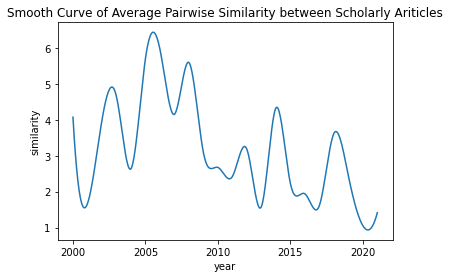

In [16]:
similarities_lst = analyze.get_d2v_similarities(D2V, data)
analyze.plot_d2v_similarities(similarities_lst, smooth=True)

# Exploring Cultural Dimensions of Nationalism Using Word2Vec

In [ ]:
# run the following line to train all w2v models from the start
analyze.train_w2v()

In [3]:
projection = analyze.project_word('日本', 'neg.txt', 'pos.txt')

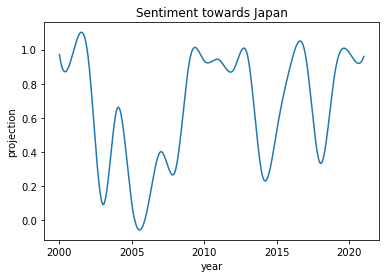

In [4]:
analyze.plot_projection('Japan', projection)